In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

import enzope

In [2]:
def mean_exchange(r1, wi, rj, wj):
    return (wi + wj) / 2
def constant_exchange(r1, wi, rj, wj):
    return .0001

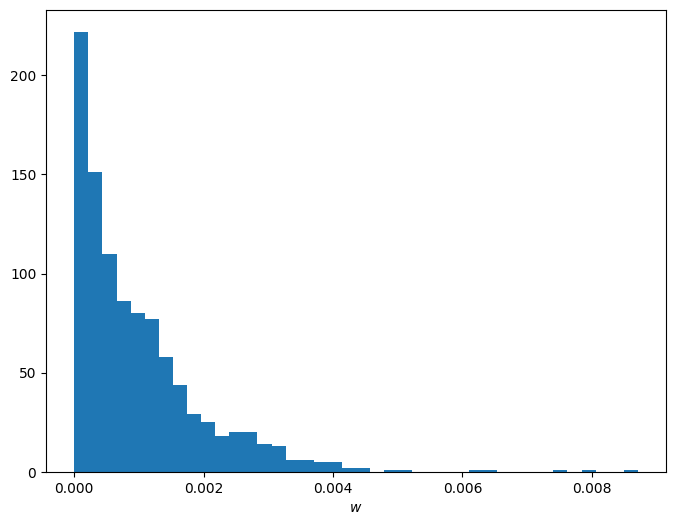

In [3]:
model = enzope.CPUModel(n_agents=1000, interaction=mean_exchange)
model.MCS(5000)
fig = enzope.distribution(model.w, bins=40)

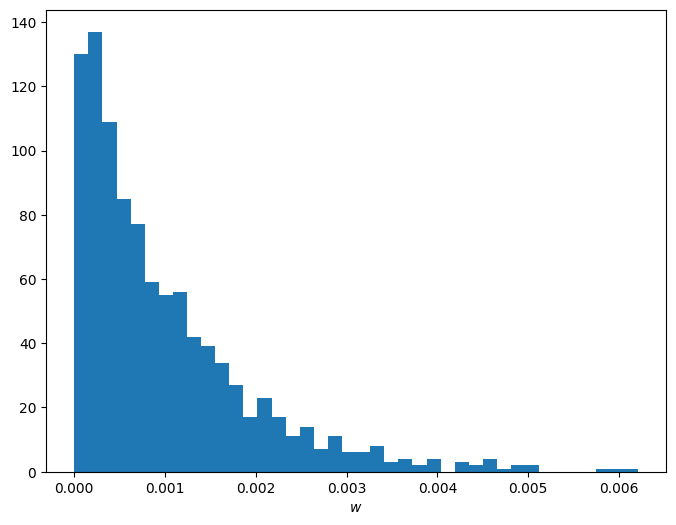

In [5]:
model = enzope.CPUModel(n_agents=1000, interaction=constant_exchange)
model.MCS(5000)
fig = enzope.distribution(model.w, bins=40)

In [5]:
def run_simulation(mcs=1000, r_frac=.7, f=.1, reps=10):
    gini1 = []
    gini2 = []
    for rep in tqdm(range(reps)):
        model1 = enzope.CPUModel(n_agents=500, f=f, measure_every=1)
        model2 = enzope.CPUModel(n_agents=500, f=f, measure_every=1)
        model2.r = np.random.uniform(0, r_frac, size=model2.n_agents)
        model1.MCS(mcs)
        model2.MCS(mcs)
        gini1.append(model1.gini)
        gini2.append(model2.gini)

    mean_1 = np.mean(gini1, axis=0)
    mean_2 = np.mean(gini2, axis=0)
    std_1 = np.std(gini1, axis=0)
    std_2 = np.std(gini2, axis=0)

    return mean_1, mean_2, std_1, std_2
    

In [6]:
r_max=.7
gini1, gini2, std1, std2 = run_simulation(mcs=200000, r_frac=r_max, f=.1, reps=15)

100%|██████████| 15/15 [3:56:48<00:00, 947.20s/it]  


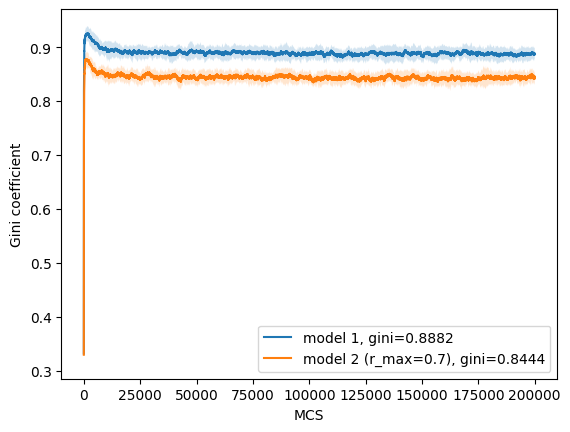

In [7]:
# plot model ginis
fig, ax = plt.subplots()
ax.plot(gini1, label=f'model 1, gini={np.mean(gini1[-1000:]):.4f}')
ax.fill_between(range(len(gini1)), gini1-std1, gini1+std1, alpha=.2)
ax.plot(gini2, label=f'model 2 (r_max={r_max}), gini={np.mean(gini2[-1000:]):.4f}')
ax.fill_between(range(len(gini2)), gini2-std2, gini2+std2, alpha=.2)
ax.legend()
ax.set_xlabel('MCS')
ax.set_ylabel('Gini coefficient');
# fig.savefig('figs/gini.png', dpi=300)

### Simulation loop

In [2]:
def run_simulation2(mcs=1000, rs=None, f=.1):
    if rs is None:
        rs = [1]
    ginis = []
    actives = []
    liquidity = []
    wealths = []
    models = [enzope.CPUModel(n_agents=1000, f=f, measure_every=1) for r in rs]
    for model, r_max in zip(models, rs):
        model.r = np.random.uniform(0, r_max, size=model.n_agents)
        model.MCS(mcs)
        ginis.append(model.gini)
        actives.append(model.n_active)
        liquidity.append(model.liquidity)
        wealths.append(model.w)

    return ginis, actives, liquidity, wealths

In [3]:
def run_ensemble(f=.1, reps=10, mcs=1000):
    rs = [.2, .3, .4, .5, .6, .7, .8, .9, 1.0]
    mcs = mcs
    f = f
    reps = reps

    gini_ensemble = []
    actives_ensemble = []
    liquidity_ensemble = []
    wealths_ensemble = []
    for _ in tqdm(range(reps)):
        gini, actives, liquidity, wealths = run_simulation2(mcs=mcs, rs=rs, f=f)
        gini_ensemble.append(gini)
        actives_ensemble.append(actives)
        liquidity_ensemble.append(liquidity)
        wealths_ensemble.append(wealths)


    np.save(f'data/1_r_max/gini_ensemble_f={f}_mcs={mcs}_various_r_max.npy', gini_ensemble)
    np.save(f'data/1_r_max/actives_ensemble_f={f}_mcs={mcs}_various_r_max.npy', actives_ensemble)
    np.save(f'data/1_r_max/liquidity_ensemble_f={f}_mcs={mcs}_various_r_max.npy', liquidity_ensemble)
    np.save(f'data/1_r_max/wealths_ensemble_f={f}_mcs={mcs}_various_r_max.npy', wealths_ensemble)


    mean_ginis = np.mean(gini_ensemble, axis=0)
    std_ginis = np.std(gini_ensemble, axis=0)

    fig, ax = plt.subplots()
    for r, gini, std in zip(rs, mean_ginis, std_ginis):
        ax.plot(gini, label=r'$r_{m}$'+f'={r}, G={np.mean(gini[-100:]):.2f}')
        ax.fill_between(range(len(gini)), gini-std, gini+std, alpha=.2)
    ax.legend()
    ax.set_xlabel('MCS')
    ax.set_ylabel('Gini coefficient');
    ax.set_title(f'$f={f}$')
    plt.grid()
    # fig.savefig(f'figs/ginis_f={f}.svg')
    # fig.savefig(f'figs/ginis_f={f}.png', dpi=300)
    plt.show()


### Main

100%|██████████| 5/5 [48:34:56<00:00, 34979.25s/it]   


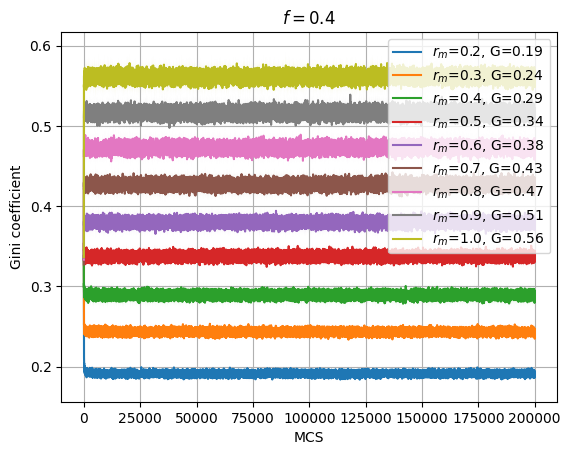

100%|██████████| 5/5 [48:32:23<00:00, 34948.65s/it]   


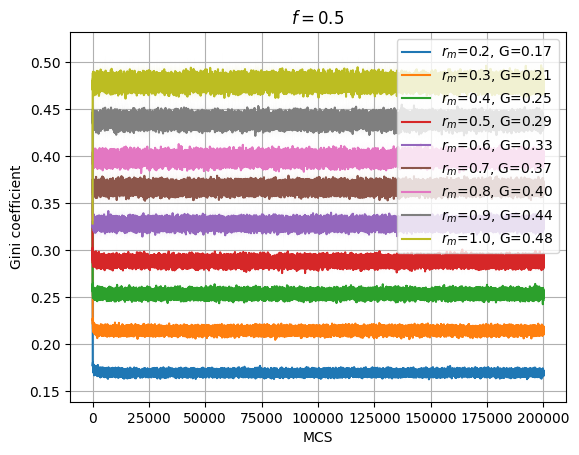

In [4]:
for f in [.4, .5]:
    run_ensemble(f=f, reps=5, mcs=200000)

In [5]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart

def send_email(receiver_email="giordanolautaro@gmail.com", subject=[], body="mail de prueba"):
    sender_email = "postmaster@sandbox33c3dc6fe96f4a2aa18406438fe43eb5.mailgun.org"
    receiver_email = receiver_email
    smtp_server = "smtp.mailgun.com"
    smtp_port = 465  # Use 587 if you are using STARTTLS

    password = "1d3731dfcf1646cf01e24914cf3e3873-4b670513-005e5abe"
    message = MIMEMultipart()
    message["From"] = sender_email
    message["To"] = receiver_email
    message["Subject"] = subject

    body = body
    message.attach(MIMEText(body, "plain"))

    server = smtplib.SMTP_SSL(smtp_server, smtp_port)
    server.login(sender_email, password)

    server.sendmail(sender_email, receiver_email, message.as_string())
    server.quit()

send_email(subject="Corrio riesgos cautos", body="")

SMTPServerDisconnected: Connection unexpectedly closed

## Ploteando

In [2]:
# rs = [.2, .4, .6, .8, 1.0]
rs = [.2, .3, .4, .5, .6, .7, .8, .9, 1.0]
fs = [0, .05, .1, .2, .3, .4, .5]
mcs = 200000

### Gini vs tiempo 

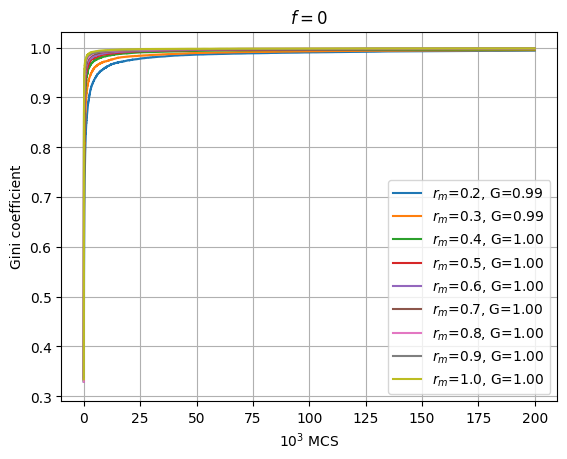

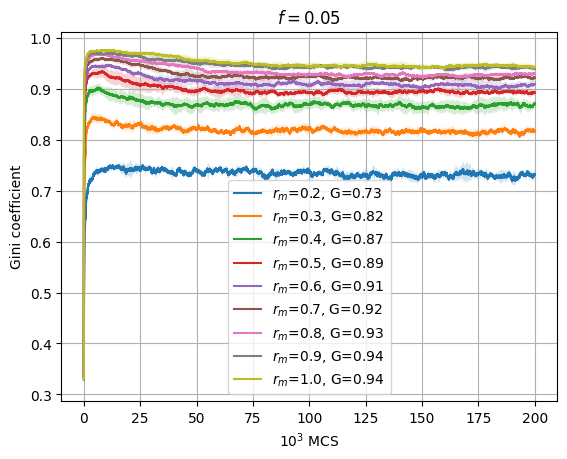

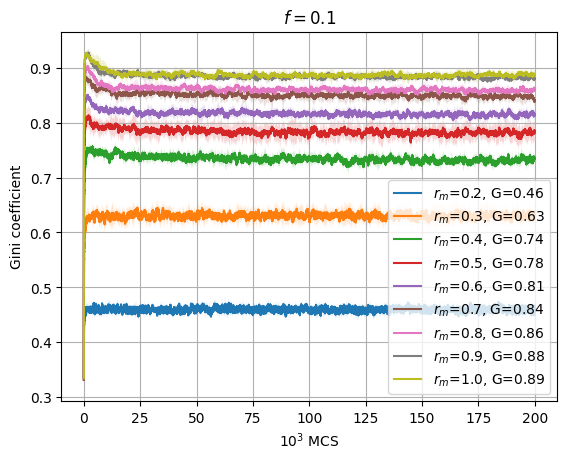

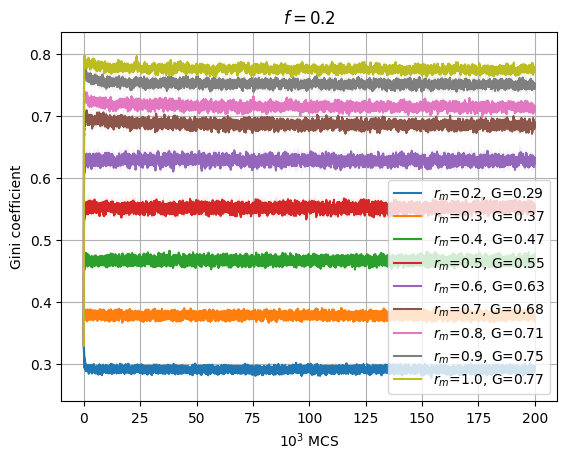

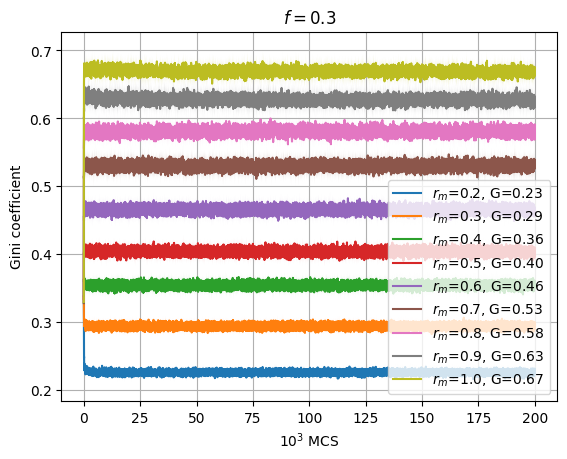

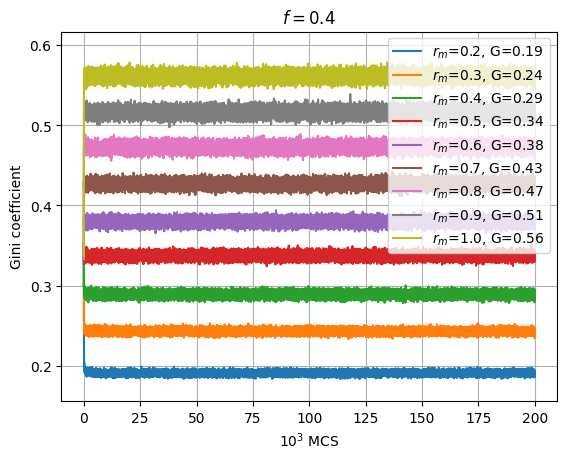

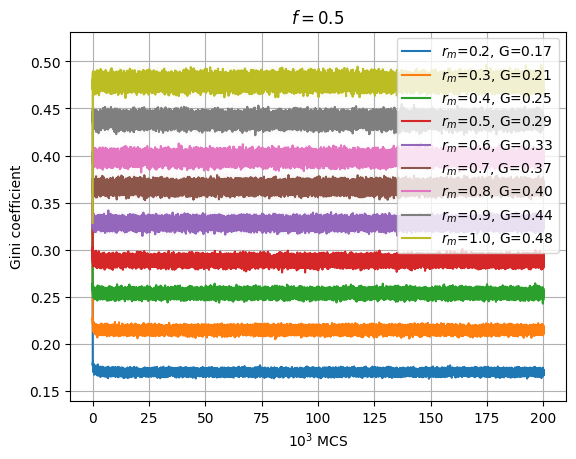

In [19]:
for f in fs:
    gini_ensemble = np.load(f'data/1_r_max/gini_ensemble_f={f}_mcs=200000_various_r_max.npy')

    mean_ginis = np.mean(gini_ensemble, axis=0)
    std_ginis = np.std(gini_ensemble, axis=0)

    fig, ax = plt.subplots()
    for r, gini, std in zip(rs, mean_ginis, std_ginis):
        ax.plot(gini, label=r'$r_{m}$'+f'={r}, G={np.mean(gini[-100:]):.2f}')
        ax.fill_between(range(len(gini)), gini-std, gini+std, alpha=.2)
    ax.legend()
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1000:.0f}'))
    ax.set_xlabel(r'$10^3$ MCS')
    ax.set_ylabel('Gini coefficient');
    ax.set_title(f'$f={f}$')
    plt.grid()
    fig.savefig(f'figs/ginis_f={f}.svg')
    fig.savefig(f'figs/ginis_f={f}.png', dpi=300)
    plt.show()


### Gini final en funcion de r_max para varios f

In [3]:
gini_final = []

for f in fs:
    gini_ensemble = np.load(f'data/1_r_max/gini_ensemble_f={f}_mcs=200000_various_r_max.npy')
    aux = [np.mean(gini[-1000:], axis=1) for gini in gini_ensemble]
    gini_final.append(np.mean(aux, axis=0))


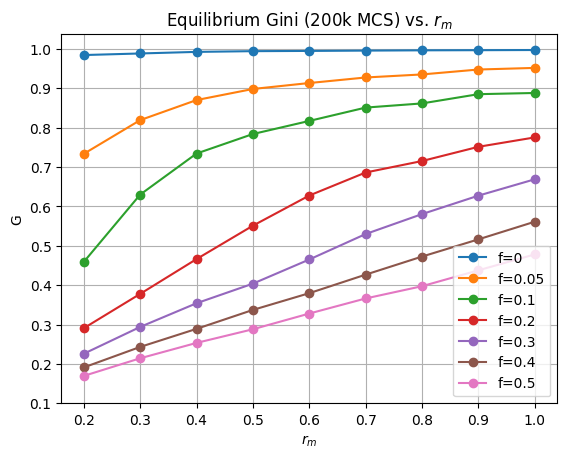

In [16]:
for f in fs:
    plt.plot(rs, gini_final[fs.index(f)], label=f'f={f}', marker='o')
plt.xlabel(r'$r_{m}$')
plt.ylabel('G')
plt.legend()
plt.title('Equilibrium Gini (200k MCS) vs. $r_{m}$')
plt.grid()
plt.yticks(np.arange(0.1, 1.1, .1))
plt.savefig('figs/gini_vs_r_max.png', dpi=300)
plt.show()

### Agentes activos

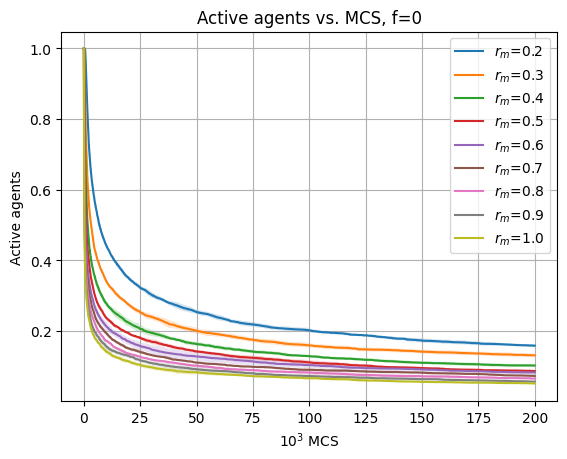

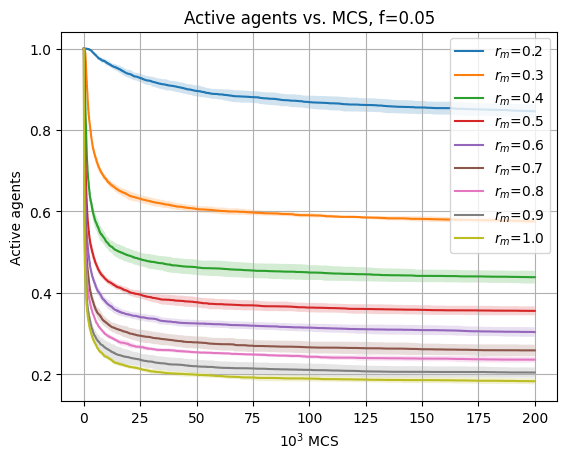

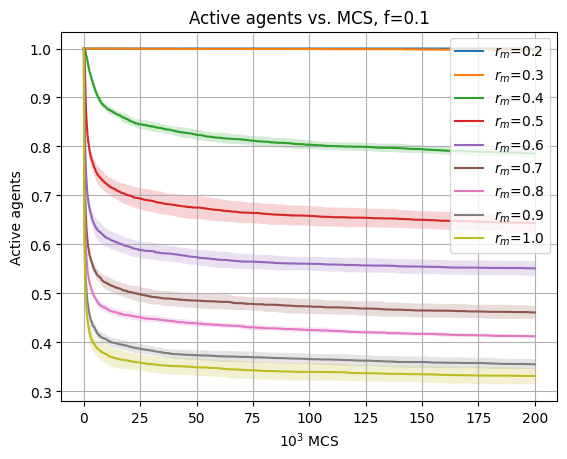

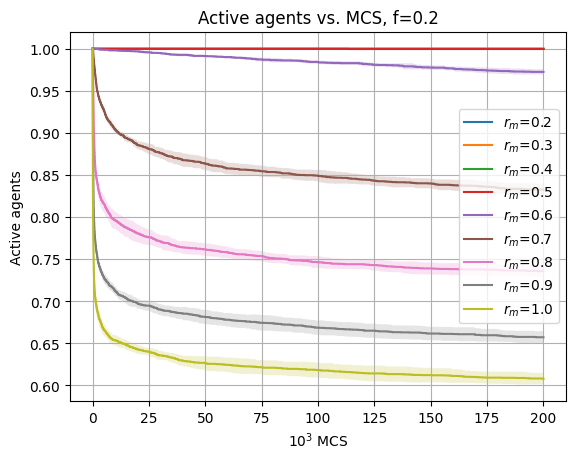

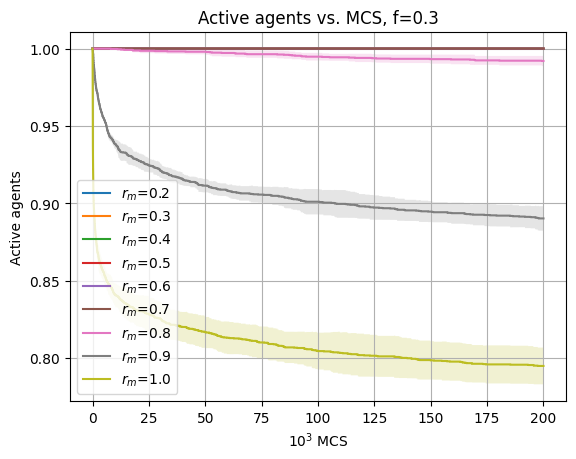

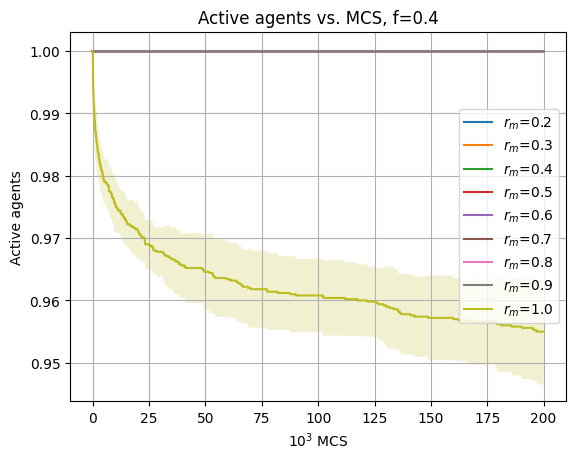

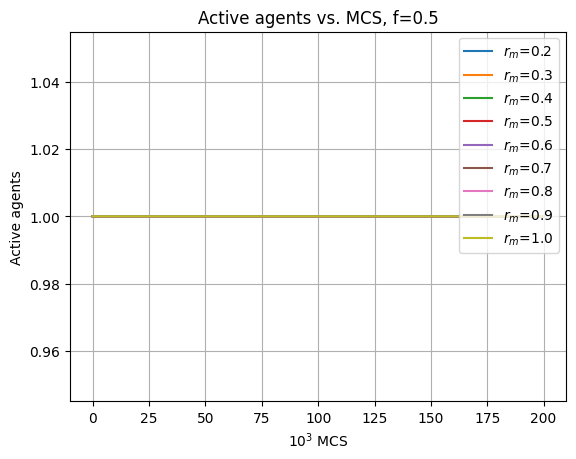

In [4]:
# Plot active agents as a function of time (not steady state) vs r_max, one plot for each f
actives_final = []

for f in fs:
    actives_ensemble = np.load(f'data/1_r_max/actives_ensemble_f={f}_mcs=200000_various_r_max.npy')
    actives_mean = np.mean(actives_ensemble, axis=0)
    actives_std = np.std(actives_ensemble, axis=0)

    fig, ax = plt.subplots()

    for r, mean, std in zip(rs, actives_mean, actives_std):
        ax.plot(mean, label=r'$r_{m}$'+f'={r}')
        ax.fill_between(range(len(mean)), mean-std, mean+std, alpha=.2)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1000:.0f}'))
    ax.set_xlabel(r'$10^3$ MCS')
    ax.set_ylabel('Active agents')
    ax.legend()
    ax.set_title(f'Active agents vs. MCS, f={f}')
    ax.grid()

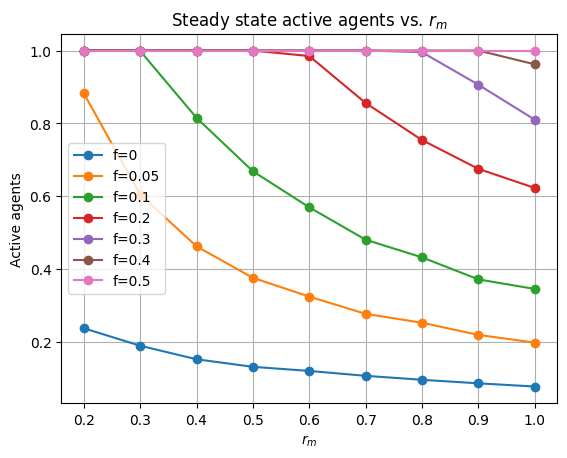

In [5]:
# Plot of the number of active agents vs. $r_{m}$ for different values of $f$
actives_final = []

for f in fs:
    actives_ensemble = np.load(f'data/1_r_max/actives_ensemble_f={f}_mcs=200000_various_r_max.npy')
    aux = [np.mean(actives[-1000:], axis=1) for actives in actives_ensemble]
    actives_final.append(np.mean(aux, axis=0))


for f in fs:
    plt.plot(rs, actives_final[fs.index(f)], label=f'f={f}', marker='o')
plt.xlabel(r'$r_{m}$')
plt.ylabel('Active agents')
plt.legend()
plt.title('Steady state active agents vs. $r_{m}$')
plt.grid()
# plt.savefig('figs/actives_vs_r_max.png', dpi=300)
plt.show()

### Liquidez

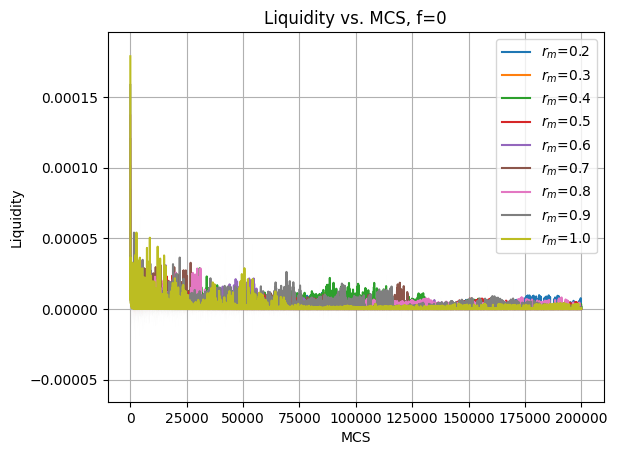

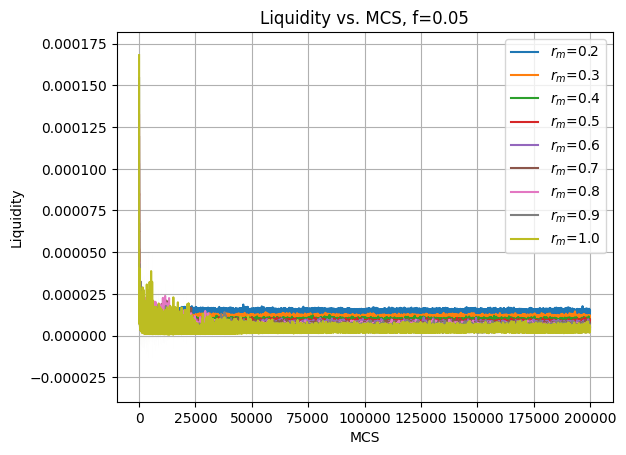

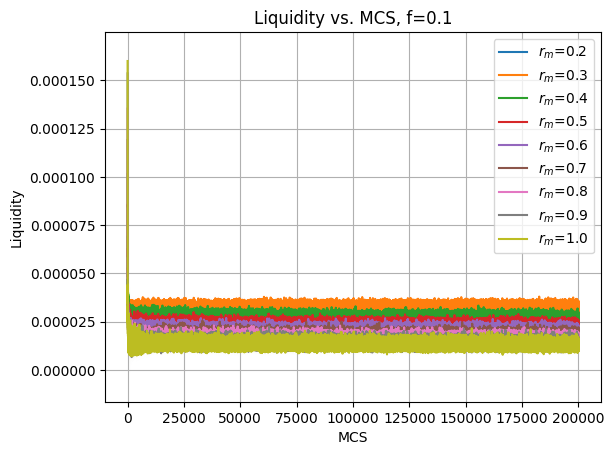

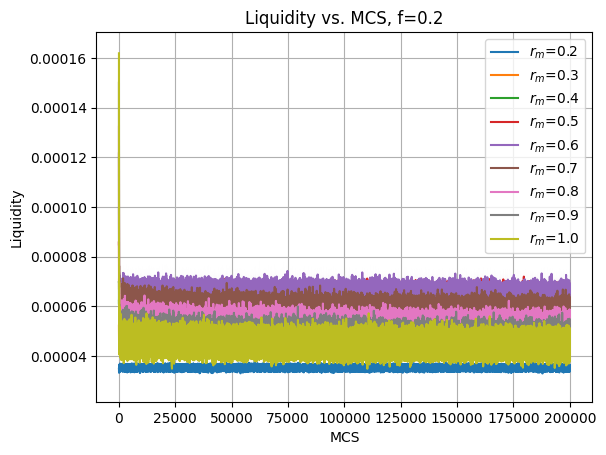

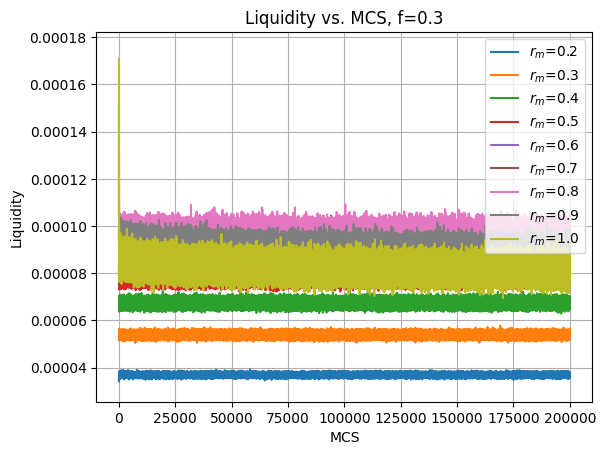

In [10]:
# Liquidity as a function of MCS vs r_max, one plot for each f
liquidity_final = []

for f in fs:
    liquidity_ensemble = np.load(f'data/1_r_max/liquidity_ensemble_f={f}_mcs=200000_various_r_max.npy')
    liquidity_mean = np.mean(liquidity_ensemble, axis=0)
    liquidity_std = np.std(liquidity_ensemble, axis=0)

    for r, mean, std in zip(rs, liquidity_mean, liquidity_std):
        plt.plot(mean, label=r'$r_{m}$'+f'={r}')
        plt.fill_between(range(len(mean)), mean-std, mean+std, alpha=.2)
    plt.xlabel('MCS')
    plt.ylabel('Liquidity')
    plt.legend()
    plt.title(f'Liquidity vs. MCS, f={f}')
    # plt.ylim(-0.00001, 0.00001)
    plt.grid()
    plt.show()

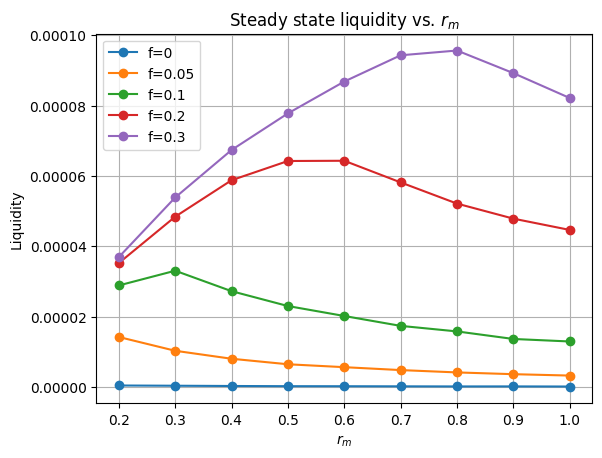

In [11]:
# Equilibrium liquidity as a function of $r_{m}$ for different values of $f$
liquidity_final = []

for f in fs:
    liquidity_ensemble = np.load(f'data/1_r_max/liquidity_ensemble_f={f}_mcs=200000_various_r_max.npy')
    aux = [np.mean(liquidity[-1000:], axis=1) for liquidity in liquidity_ensemble]
    liquidity_final.append(np.mean(aux, axis=0))


for f in fs:
    plt.plot(rs, liquidity_final[fs.index(f)], label=f'f={f}', marker='o')
plt.xlabel(r'$r_{m}$')
plt.ylabel('Liquidity')
plt.legend()
plt.title('Steady state liquidity vs. $r_{m}$')
plt.grid()
# plt.savefig('figs/liquidity_vs_r_max.png', dpi=300)
plt.show()


### Wealth distribution

In [3]:
# Wealth distribution plot, one for each f
wealths_final = []

f=0.2
wealths_ensemble = np.load(f'data/1_r_max/wealths_ensemble_f={f}_mcs=200000_various_r_max.npy')
wealth_reshaped = []
for j in range(wealths_ensemble.shape[1]):
    wealth_reshaped.append(np.array([wealths_ensemble[i][j] for i in range(5)]))
    wealth_reshaped[j] = wealth_reshaped[j].flatten()

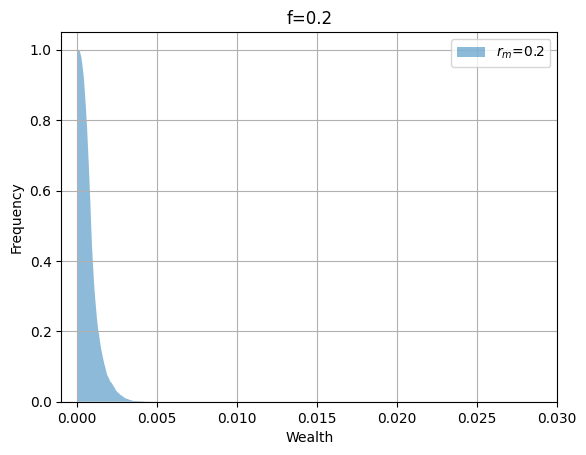

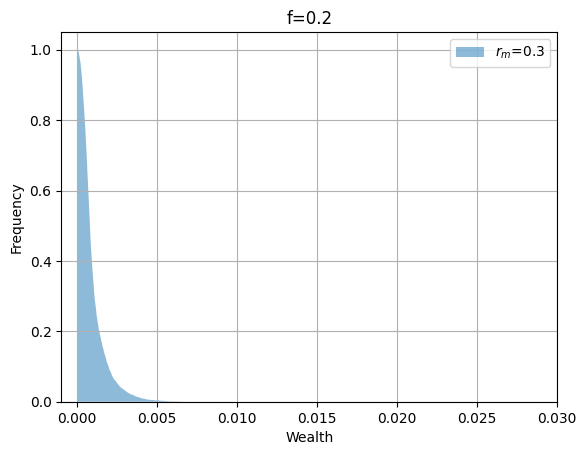

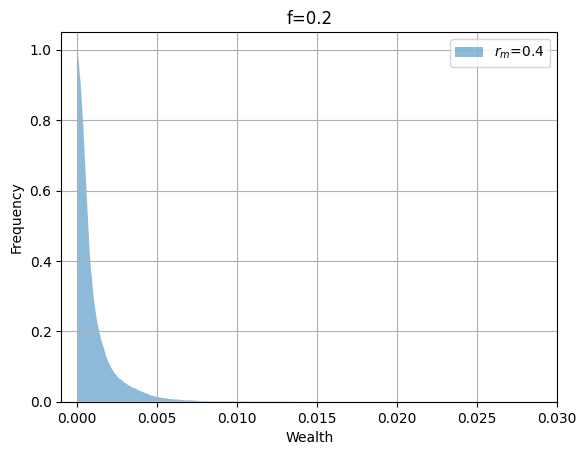

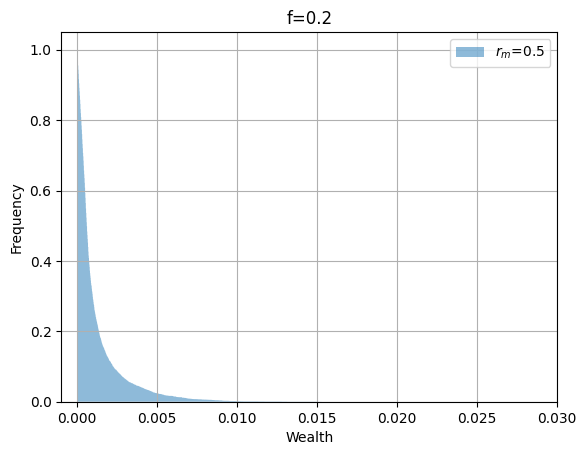

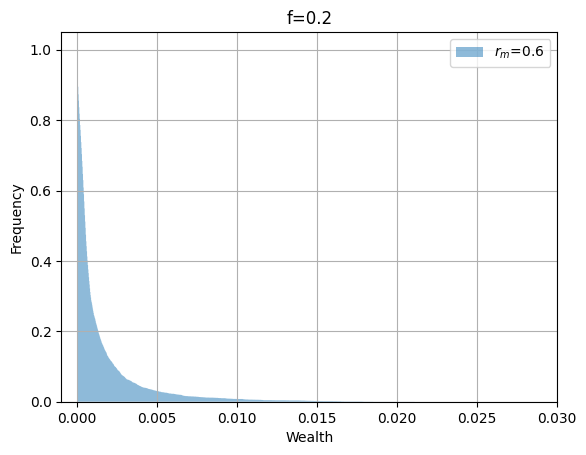

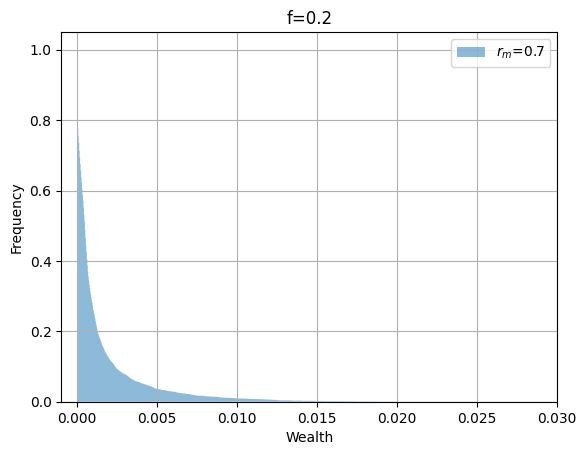

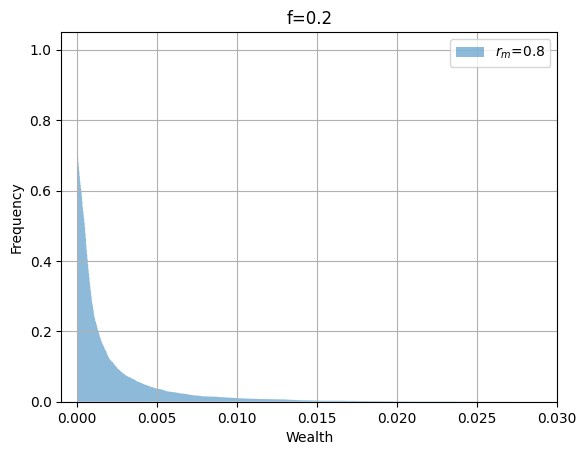

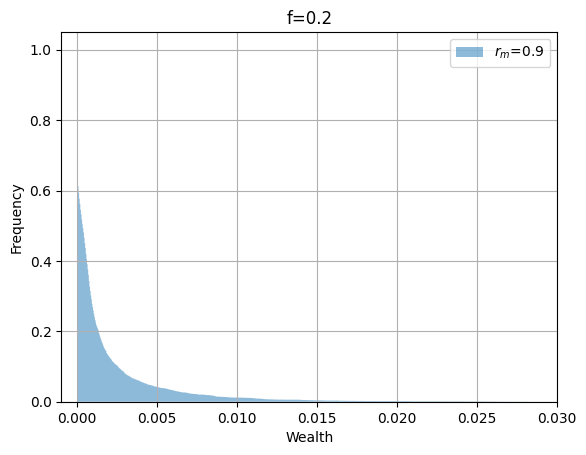

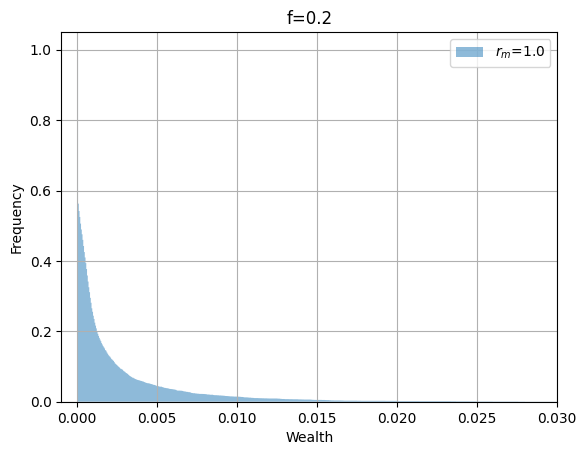

In [4]:
for r, wealths in zip(rs, wealth_reshaped):
    fig, ax = plt.subplots()
    ax.hist(wealths, bins=1000, label=r'$r_{m}$'+f'={r}', alpha=.5, histtype='stepfilled', density=True, cumulative=-1)
    ax.legend()
    ax.set_xlabel('Wealth')
    ax.set_ylabel('Frequency')
    ax.set_title(f'f={f}')
    plt.grid()
    ax.set_xlim(-.001, .03)
plt.show()

In [5]:
# Wealth distribution plot, one for each f
wealths_final = []

f=0.2
wealths_ensemble = np.load(f'data/1_r_max/wealths_ensemble_f={f}_mcs=200000_various_r_max.npy')
wealth_reshaped = []
for j in range(wealths_ensemble.shape[1]):
    wealth_reshaped.append(np.array([wealths_ensemble[i][j] for i in range(5)]))
    wealth_reshaped[j] = wealth_reshaped[j].flatten()

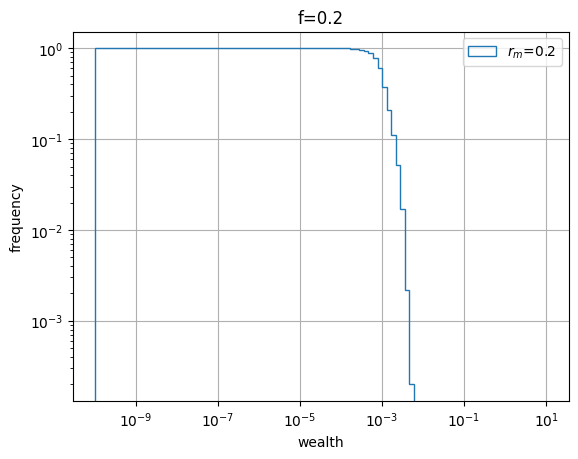

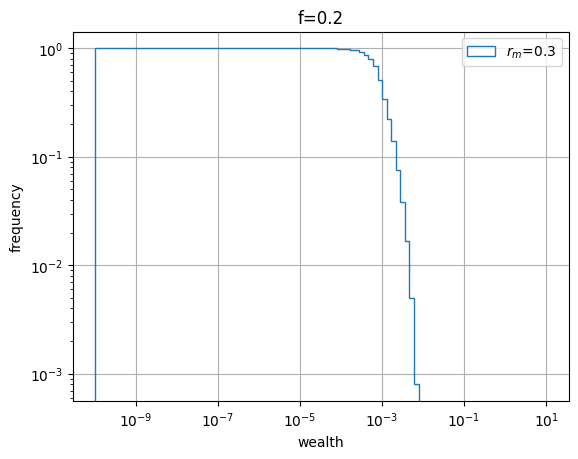

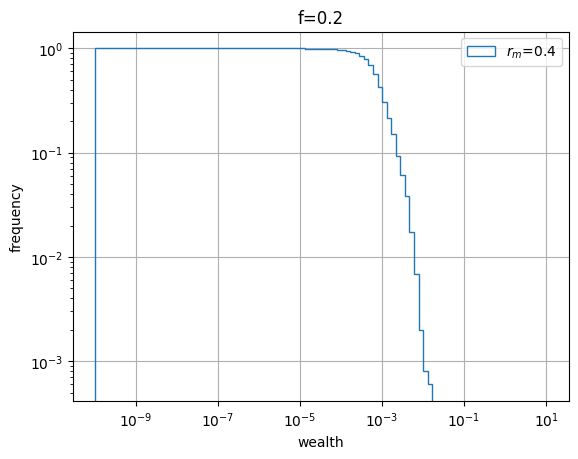

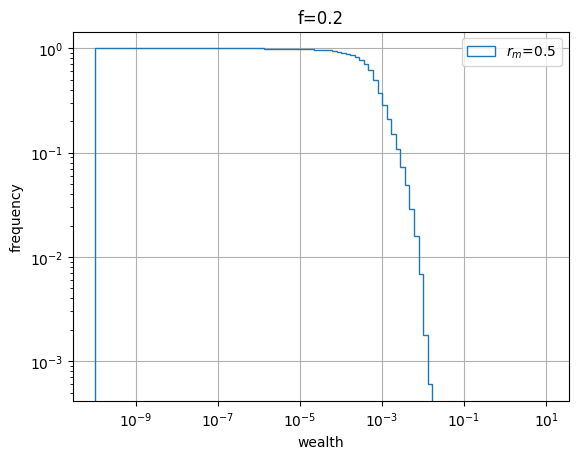

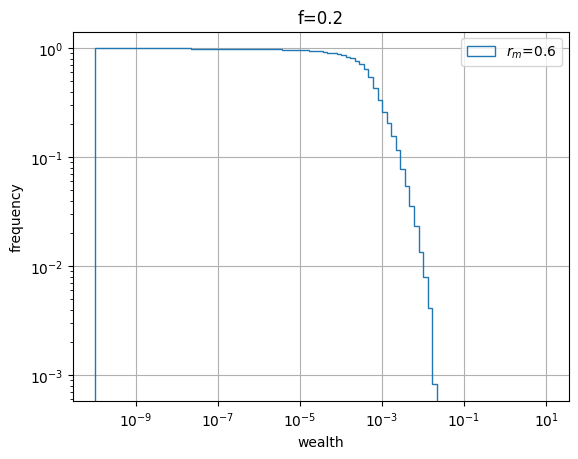

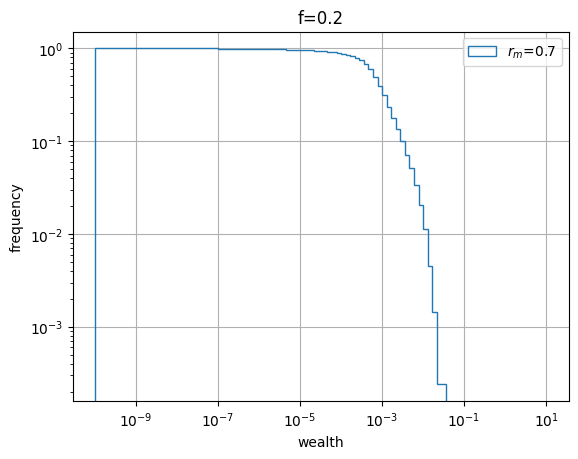

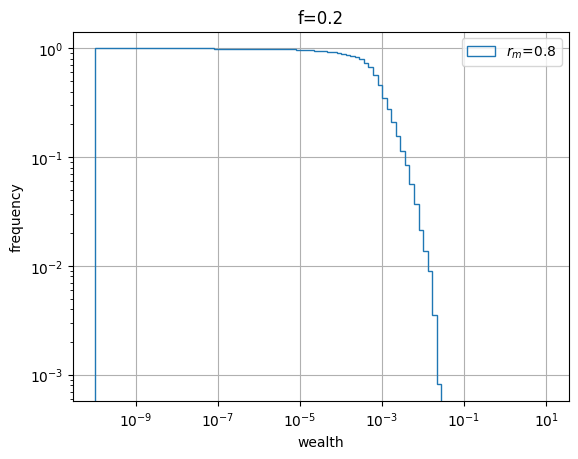

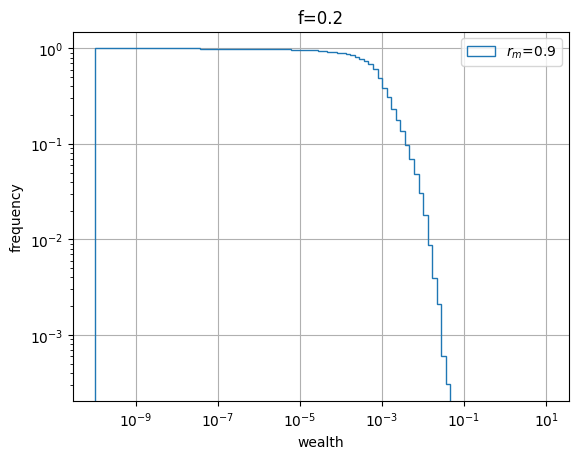

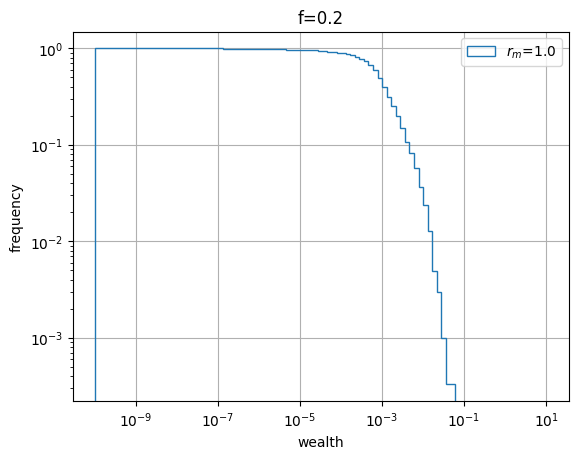

In [6]:
# Log wealth distribution plot, one for each f, wealths ensemble already present
for r, wealths in zip(rs, wealth_reshaped):
    fig, ax = plt.subplots()
    logbins = np.logspace(-10, 1, 100)
    ax.hist(wealths, bins=logbins, label=r'$r_{m}$'+f'={r}', alpha=1, histtype='step', density=True, cumulative=-1)
    ax.legend()
    ax.set_xlabel('wealth')
    ax.set_ylabel('frequency')
    ax.set_title(f'f={f}')
    plt.grid()

    ax.set_yscale('log')
    ax.set_xscale('log')
    # ax.set_xlim(-.001, .04)
plt.show()
